<a href="https://colab.research.google.com/github/kvishnu78/ML-Algorithms/blob/main/SVM_Classifier_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upoading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


Import Section

In [ ]:
import pandas as pd #to read from excel
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm # to use SVM classifier

Loading the dataset

In [ ]:
dataset=pd.read_csv("winequalityN.csv")
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
dataset.update(dataset.fillna(dataset.mean()))
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:

features = ['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']
# features = ['free sulfur dioxide','total sulfur dioxide']
x = dataset[features]
y = dataset['quality'] 



In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=3,shuffle=True)

In [ ]:

from imblearn.over_sampling import SMOTE
from collections import Counter
# oversampling after splitting as otherwise there can be same samples in both test and train causing the model to memorize

import warnings
warnings.filterwarnings('ignore')
# to supress the depreciated function usage warnings
counter=Counter(train_y)
print("Before:",counter)
smt=SMOTE(k_neighbors=2,sampling_strategy="all")
# smt=SMOTE(k_neighbors=2)
train_xo,train_yo=smt.fit_resample(train_x,train_y)
counter=Counter(train_yo)
print("After:",counter)


Before: Counter({6: 2005, 5: 1496, 7: 750, 4: 142, 8: 129, 3: 22, 9: 3})
After: Counter({7: 2005, 5: 2005, 6: 2005, 8: 2005, 4: 2005, 3: 2005, 9: 2005})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Normalisation
#using normalised data as dataset is made of numerical values and is in diff ranges
from sklearn.preprocessing import Normalizer
N=Normalizer()
train_x=N.fit_transform(train_x)
train_xo=N.fit_transform(train_xo) # normalizing oversampled data

test_x=N.transform(test_x)



SVM Classifier - train test split

Confusion matrix for the  Linear kernal SVC and Oversampled training data against test sample  :



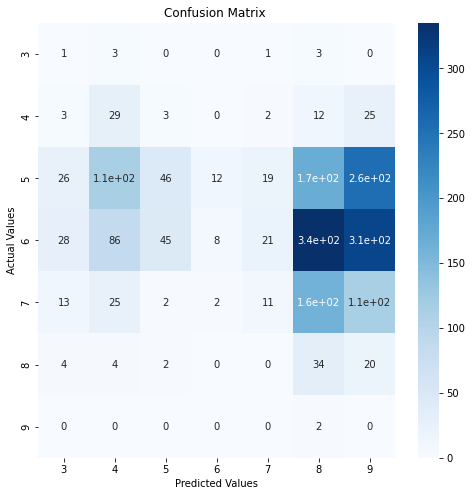



Confusion matrix for the  Linear kernal SVC and Oversampled training data against training sample  :



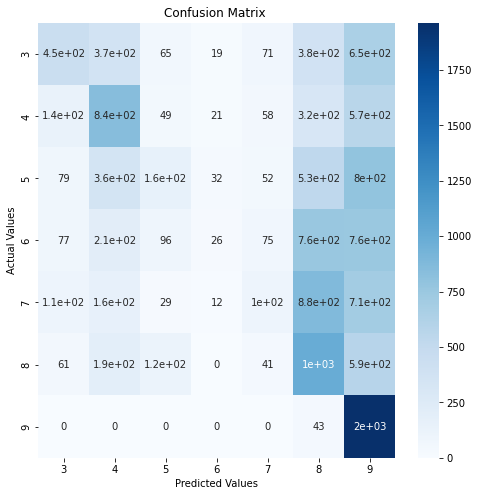



Confusion matrix for the  Linear kernal SVC and Original training data against training sample  :



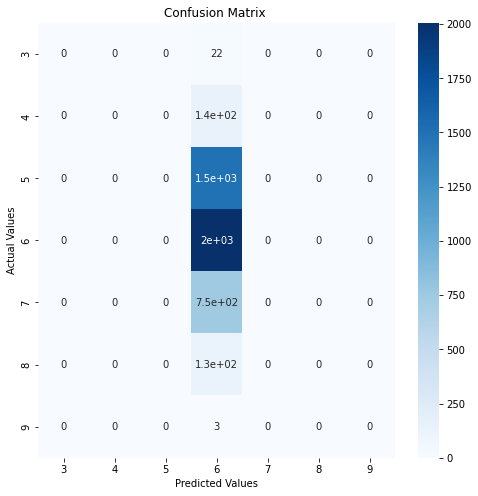



Confusion matrix for the  Linear kernal SVC and Original training data against test sample  :



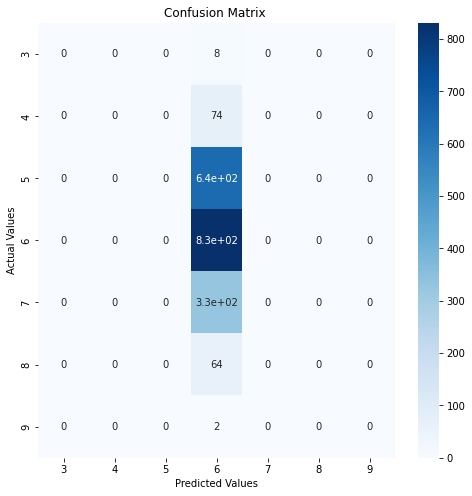



Confusion matrix for the  Polynomial kernal SVC and Oversampled training data against test sample  :



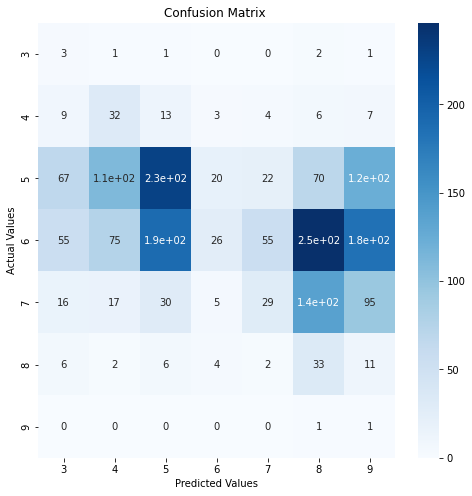



Confusion matrix for the  Polynomial kernal SVC and Oversampled training data against training sample  :



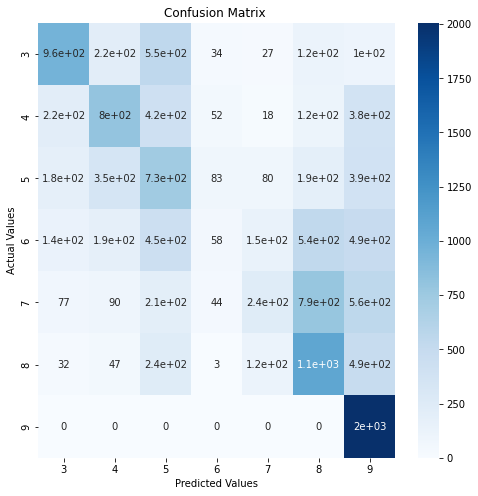



Confusion matrix for the  Polynomial kernal SVC and Original training data against training sample  :



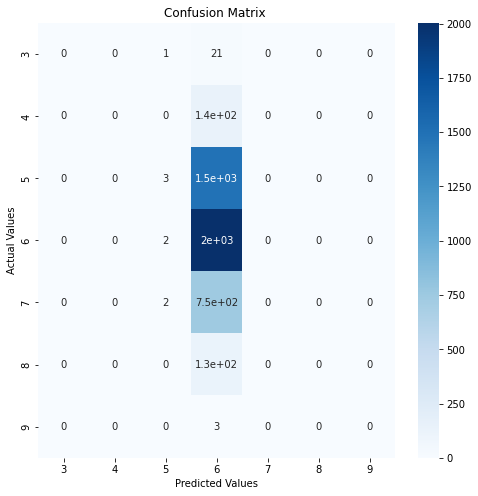



Confusion matrix for the  Polynomial kernal SVC and Original training data against test sample  :



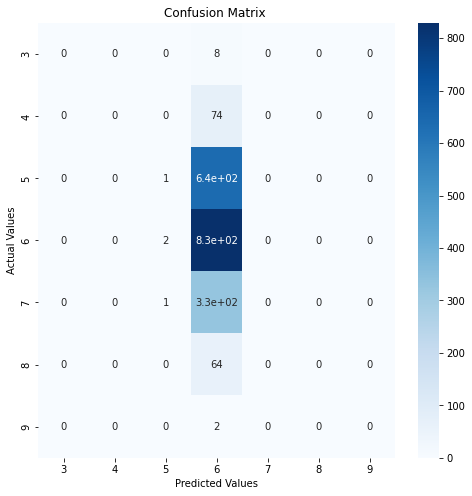



Kernel Function        Combination                                          Accuracy    Precision    Recall
---------------------  -------------------------------------------------  ----------  -----------  --------
Linear kernal SVC      Oversampled training data against test sample         6.61538      17.2647   16.6122
Linear kernal SVC      Oversampled training data against training sample    32.4118       32.4538   32.4118
Linear kernal SVC      Original training data against training sample       44.095        92.0136   14.2857
Linear kernal SVC      Original training data against test sample           42.6154       91.8022   14.2857
Polynomial kernal SVC  Oversampled training data against test sample        18.1026       20.26     32.8456
Polynomial kernal SVC  Oversampled training data against training sample    41.8169       39.6653   41.8169
Polynomial kernal SVC  Original training data against training sample       44.117        83.0898   14.3001
Polynomial kernal SVC  Ori

In [ ]:
def confusion(test_y,pred_y):
  cm=metrics.confusion_matrix(test_y,pred_y,)
  #Datatframe to plot confusion matrix
  df=pd.DataFrame(cm,index=['3','4','5','6','7','8','9'],columns=['3','4','5','6','7','8','9'])
  plt.figure(figsize=(8,8))
  sns.heatmap(df,annot=True,cmap='Blues')
  st='Confusion Matrix '
  plt.title(st)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("\n")

table=[]
def res(model,xin,yin,xtest,ytest,kernelName,combination):
  model.fit(xin,yin)
  y_pred=model.predict(xtest)
  print("Confusion matrix for the ", kernelName ,"and",combination," :\n")
  confusion(ytest,y_pred)
  accuracy=100*metrics.accuracy_score(ytest,y_pred)
  precision=100*metrics.precision_score(ytest,y_pred,average="macro",zero_division=1)#macro tells to find unweighted avg
  recall=100*metrics.recall_score(ytest,y_pred,average="macro",zero_division=1)
  table.append([kernelName,combination,accuracy,precision,recall])

def modelDefinition(kernelfun,descr):
  model=svm.SVC(kernel=kernelfun)
  res(model,train_xo,train_yo,test_x,test_y,descr,"Oversampled training data against test sample")
  res(model,train_xo,train_yo,train_xo,train_yo,descr,"Oversampled training data against training sample")
  res(model,train_x,train_y,train_x,train_y,descr,"Original training data against training sample")
  res(model,train_x,train_y,test_x,test_y,descr,"Original training data against test sample")


modelDefinition("linear","Linear kernal SVC")
modelDefinition("poly","Polynomial kernal SVC")
# since svm is a binary classification natively, it uses one to one scheme while classifying a multi class problem
# n(n-1)/2 classifiers are run

print(tabulate(table,headers=["Kernel Function","Combination","Accuracy","Precision","Recall"]))


Model visualisation(only the best in linear and nonlinear)

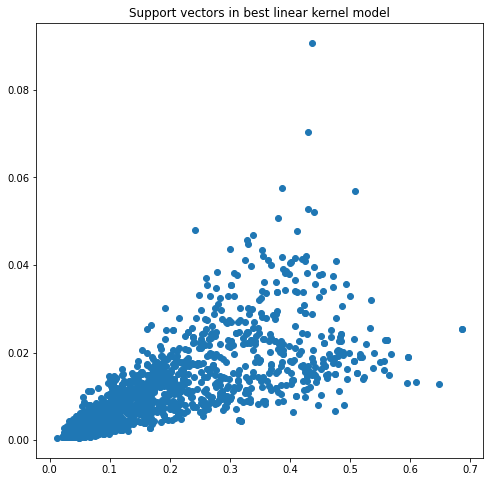

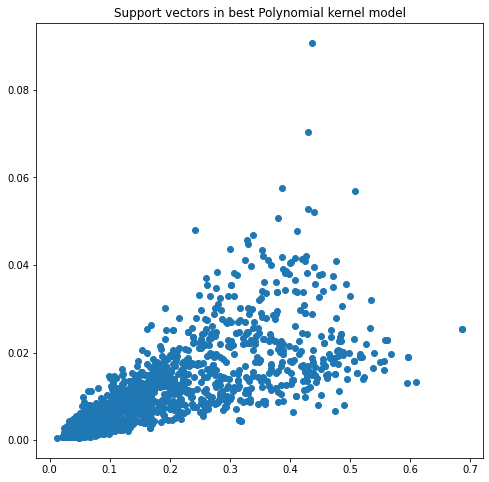

In [ ]:
svmCL=svm.SVC(kernel='linear')
svmCL.fit(train_x,train_y)
svmCP=svm.SVC(kernel='poly')
svmCP.fit(train_x,train_y)

SV_indices=svmCL.support_ # index numbers of the samples from training set that were found to be the support vectors.
sv_perClass=svmCL.n_support_ # number of support vectors per class
  

def printSV(model,desc):
  plt.figure(figsize=(8,8))
  SV=model.support_vectors_ # support vectors
  plt.title(desc)
  plt.scatter(SV[:,0],SV[:,1])
# [:,i] means from 1st row to last row in column i
  plt.show()
  print("\n")



printSV(svmCL,'Support vectors in best linear kernel model')
printSV(svmCP,'Support vectors in best Polynomial kernel model')


Loading a smaller dataset for easier dataset visualization

*   List item
*   List item



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
dataset=pd.read_csv("winequality-red.csv")
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
var=dataset.var()
print(var)
# features = ['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']
features = ['free sulfur dioxide','total sulfur dioxide']
x = dataset[features]
y = dataset['quality'] 



fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64


In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=3,shuffle=True)

In [ ]:
# Reference:https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h=.1
#create the mesh
x_min,x_max=x['free sulfur dioxide'].min()-1,x['free sulfur dioxide'].max()+1
y_min,y_max=x['total sulfur dioxide'].min()-1,x['total sulfur dioxide'].max()+1
xnew,ynew=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


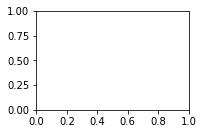

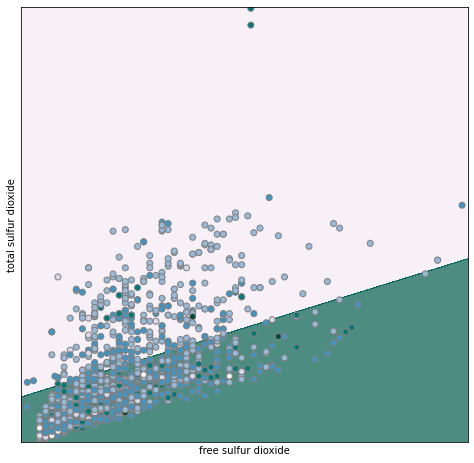

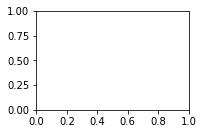

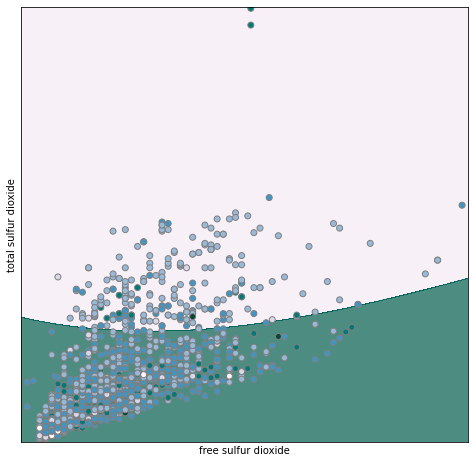

In [ ]:
svmCL=svm.SVC(kernel='linear')
svmCL.fit(train_x,train_y)
svmCP=svm.SVC(kernel='poly')
svmCP.fit(train_x,train_y)

model=[svmCL,svmCP]
# for i, clf in model:

def fun(clf,i):  
    plt.subplot(2,2,i+1)
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(wspace=0.4,hspace=0.4) 
    Z=clf.predict(np.c_[xnew.ravel(),ynew.ravel()])
    # coloring the result
    Z=Z.reshape(xnew.shape)
    plt.contourf(xnew,ynew,Z,cmap=plt.cm.PuBuGn,alpha=0.7)
    # plot the training data
    plt.scatter(x['free sulfur dioxide'],x['total sulfur dioxide'],c=y,cmap=plt.cm.PuBuGn,edgecolors='grey')
    plt.xlabel('free sulfur dioxide')
    plt.ylabel('total sulfur dioxide')
    plt.xlim(xnew.min(),xnew.max())
    plt.ylim(ynew.min(),ynew.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


fun(svmCL,0)
fun(svmCP,1)

SVM Classifier - CROSS VALIDATION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# to supress the zero division warnings

def met(model,cv,cvtype,k,modelName,table):
  AccuracyScores=cross_val_score(model,x,y,scoring='accuracy',cv=cv)
  PrecisionScores=cross_val_score(model,x,y,scoring='precision_macro',cv=cv)
  RecallScores=cross_val_score(model,x,y,scoring='recall_macro',cv=cv)
  accuracy=round(100*np.mean(AccuracyScores),2)
  precision=round(100*np.mean(PrecisionScores),2)
  recall=round(100*np.mean(RecallScores),2)
  table.append([modelName,cvtype,k,accuracy,precision,recall])

def met_supp(k,model,modelName,cv,table):
  met(model,cv[0],cv[1],k,modelName,table)
  

svmCL=svm.SVC(kernel="linear")
svmCP=svm.SVC(kernel="poly")

# PERFORMANCES
print('\tCross validation results for different models and k values\n')
for i in range(5,11):
  table=[]
  cv=[KFold(n_splits=i),"K Fold CV"]
  met_supp(i,svmCL,"Linear kernal SVC",cv,table)
  met_supp(i,svmCP,"Polynomial kernal SVC",cv,table)
  print(tabulate(table,headers=["Model","Cross Validation Type","K","Accuracy","Precision","Recall"]))
  print("\n-----------------------------------------------------------------------------\n")


	Cross validation results for different models and k values

Model                  Cross Validation Type      K    Accuracy    Precision    Recall
---------------------  -----------------------  ---  ----------  -----------  --------
Linear kernal SVC      K Fold CV                  5       48.47        18.91     21.26
Polynomial kernal SVC  K Fold CV                  5       47.66        20.15     21.4

-----------------------------------------------------------------------------

Model                  Cross Validation Type      K    Accuracy    Precision    Recall
---------------------  -----------------------  ---  ----------  -----------  --------
Linear kernal SVC      K Fold CV                  6       48.52        19.33      21.6
Polynomial kernal SVC  K Fold CV                  6       47.15        20.27      21.2

-----------------------------------------------------------------------------

Model                  Cross Validation Type      K    Accuracy    Precision    Reca